# Intro to Machine Learning

aka 

* Predictive Analytics
* Artificial Intelligence
* Predictive Modeling

etc

## Why the AI excitement now? 

#### What's new or changed?
  
* More data
* More compute
* Free and open-source commodity tooling
  * Algorithms
  * Wrapper frameworks
  * Operational patterns (e.g., containerization, microservices, etc.)
* More data engineers/analysts/scientists in most industries
  * n.b., finance, pharma, travel, insurance, weather, government have been doing this for a long time but it has not always translated into a "head start"
  
#### What's the same?

* "Garbage In - Garbage Out"
* Mediocre statistical understanding, mathematical reasoning
* Conflicting organizational priorities
* Regulatory oversight and restrictions (for some industries/data)

#### What are we still waiting for?

* "Automagic" data preparation and modeling
* Consensus on legal/ethical use of models, and regulatory frameworks
* Automation of non-trivial human tasks
  * "Anything that a typical human can do with at most 1 sec of thought, can probably now or soon be automated with AI." -Andrew Ng
* Consensus on roles, responsibilities, titles, training, etc.

## What are the applications of AI to business data?

* More sales
* Better sales (customer segmentation, pricing)
* Better products/services/processes/operations
* Fewer defects/failures
* Increased velocity
* Lower costs

## A business process model for AI: CRISP-DM

__"Cross-Industry Standard Process for Data Mining"__

https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining

<img src="https://materials.s3.amazonaws.com/i/bqdknQ1.png" width=400>

CRISP-DM is not necessarily the right, complete solution for your business. But it's a starting point.

## Obtaining & Understanding Data

Authors at Google wrote a paper (https://papers.nips.cc/paper/5656-hidden-technical-debt-in-machine-learning-systems.pdf) featuring this widely used image:

<img src="https://materials.s3.amazonaws.com/i/MRtjDiB.png" width=800>

In a nutshell, just because we "have" tons of data from our transactions, sales channels, devices, suppliers, etc. does not make that data useful right away for AI.

Cost-Benefit analysis should be used when determining the allocation of resources for new data-driven initiatives including AI.

*Beware products and papers claiming that your data can be automatically processed, or that some AI model can learn from a very small amount of data.*

For example, some claims about learning from little or no data are technically true and mathemathematically interesting for researchers. But they should be treated with extreme caution in most business analytics settings.

## Training vs. Test Data

__Idea__: It's easy to cheat if you have the answers in front of you. Since machines have fast, accurate memory, it's easy for them to cheat if they have ever seen *any aspect* of the "answers" (or any signal that leaks information about them).

What do we mean by "cheating"? What could go wrong?

__The typical problem is a model that seems to do really well (posts great scores) when we're developing it but doesn't do so well in real life.__ Since our business goals depend on the model working on new data records, we want to avoid this scenario.

For AI, we have to be careful to separate training data from test data, or we may not be able to figure out how well the model performs.

__Terminology__: Training set; evaluation set; test set. 

Data leakage: any information about the data records which may be present when we are modeling/analyzing, but would not realistically be present when performing prediction or inference on new records.

__Let's see an example of leakage__

# Dataset: Diamonds

This dataset of diamond sales (http://ggplot2.tidyverse.org/reference/diamonds.html) is of moderate size (~55,000 records) and resembles data records that occur in many business scenarios.

For each of the diamond sales records, we have the following properties:
* price: price in US dollars ($326-$18,823)
* carat: weight of the diamond (0.2-5.01)
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond colour, from J (worst) to D (best)
* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: length in mm (0-10.74)
* y: width in mm (0-58.9)
* z: depth in mm (0-31.8)
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)
* table: width of top of diamond relative to widest point (43-95)

In [2]:
import pandas as pd

df = pd.read_csv('data/diamonds.csv')

df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The "unnamed" column is a row number in the dataset. It turns out that this row number -- which sounds like it should be meaningless -- actually leaks key data about the diamonds. 

Can you think of why this might be?

In [3]:
df.iloc[:,1]

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

In [4]:
df['price']

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

[Text(0, 0.5, '$'), Text(0.5, 0, 'record #')]

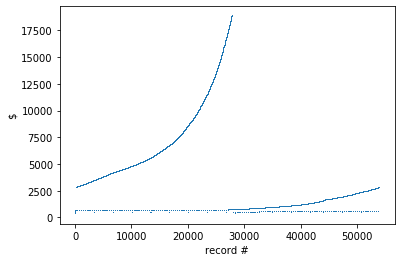

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(df.iloc[:,0], df['price'], ',') # , means just a pixel marker
ax.set(xlabel='record #', ylabel='$')

Let's get rid of the row number:

In [7]:
df2 = df.drop(df.columns[0], axis=1)

df2[:3]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


## Predictors / Response

More terminology and key ideas:

__"Predictors"__ are properties of our data records that we can learn from, and which typically are available when we want to make a prediction in the future.

__Example: We would like to predict the rental price of an apartment based on its location, square footage, and number of bedrooms__

In this example, the location, square footage, and number of bedrooms are all *predictors* because we can learn from them and we will usually know them when we want to predict a rental price of a new apartment listing in the future.

__"Response"__ is the thing we want to predict -- it's available for learning, but __not__ availabile when we want to make a prediction in the future.

In our example, the rental price would be the "response variable" ... we have historical records to train from, but when we apply our model in the future, we want the model to predict the (unknown, likely) rental price.



## Business rules & "Priors" (aka prior belief, prior distribution)

Many discussions of AI, as well as books and even famouse competitions (e.g., Kaggle) proceed solely via manipulating data with math, and make no reference to industry knowledge and business rules.

__This phenomenon is *not* because AI is smarter than traditional business knowledge__ but rather because those AI resources are more focused in the mathematical abstractions over predictorsa. (Bayesian and some other specific modeling techniques are exceptions to this generalization.)

In real life, you most definitely want to apply your knowledge of the business domain to improve your models' accuracy, as well as save lots of time and money forcing a model to "learn" things that are obviously true in your business.

Many real world patterns or constraints can be applied to AI modeling and will usually improve the outcome (though we do want to be careful that we don't apply unnecessary or illegitimate assumptions).

Sometimes this practice is described (or even implemented) as a "prior distribution" (or just "prior"). This refers to the distribution of data that we believe holds true before we've tried to learn from our data records. 

Some priors imply basic "common sense" -- like the idea that a crime rate or square footage can't be a negative number

Others are domain-specific: e.g., considering rent in San Francisco, we might start out with the belief that every habitable 1-bedroom apartment costs more than $1500 per month. If we can bake this belief into the model prior to training, the result may better reflect real world prices. It's not magic -- it's just providing additional information to the system.

## Regression vs. Classification

Most machine learning problems are either "regression" problems or "classification" problems.

__Regression__ means that we would like to predict number or value from a continuous range. For example, predicing apartment price in dollars is a regression problem.

__Classification__ means that our response variable takes on one of a discrete set of values. If we have some properties about a transaction, and we want to predict whether the transaction is fraudulent, that is a classification problem because the answer comes from a set of just two values: "fraud" or "not-fraud." Handwriting recognition is also a classification problem: given a hand written character, we want to know which letter or word (from a specific set) it corresponds to.

<img src="https://materials.s3.amazonaws.com/i/L1vwRDL.png">

## Algorithm: k-Nearest-Neighbors (kNN)

Let's discuss an algorithm. What is an algorithm? A set of steps for processing input to reach some goal. In this case, our goal is to build some sort of model that we can use to predict valuable things in the future.

But what is a model? A model is an abstraction of a system and so can "be" almost anything. We're more concerned with how useful it is to us -- how well it can improve our business by making good predictions -- than the philosophy of exactly what it "is."

### kNN

One really simple -- and surprisingly accurate -- model is called "k Nearest Neighbors" or kNN for short.

What is kNN about? 

It's based on the idea that one way to make a prediction for a new record is to find some records we already know about, and which are as similar as possible to the new one. In our apartment example, one way to set a price for a new apartment -- and one used by real estate agents -- is to look at "comparables" which are other, similar apartments.

How many similar items do we look for? That's the "k" and you get to decide what to use for k. In some problem domains, we might look at just one or two records, especially if we have a lot of examples so we can find some that are very similar. For real estate pricing, we might want to look at more -- perhaps 20 or 30 -- depending upon how complex the market is.

Once we find the k most similar records, we might average their prices or use another formula to get our predicted price.

<img src="https://materials.s3.amazonaws.com/i/WbW58ty.png">

__So what's the model here?__

In this case, the model is just all of the records we have. We don't really need to do anything with them except make sure they're converted to a form that allows us to measure "nearest" or "most similar" (which itself can be nontrivial)

kNN, despite being simple, can work well ... but it is often impractical. Why? it works best when we have lots of data points with lots of variety ... and we need to keep all of those data points in order to be able to make a prediction. So it's often not compact nor fast. Put another way, it doesn't abstract or describe patterns in the data.

### Before giving up on kNN, though, let's give it a try and see an actual example.

__Using our diamonds dataset,__ let's work on predicting price from the other properties of the diamond.

*Price will be the response variable*, while all the others are predictors.

Since we are predicting a number that can take on any value (> $0 anyway), this is a regression problem.

#### Categorical Feautres

Now ... computers are good with numbers, but what about those words? ("Premium", "Ideal", etc.)

It turns out that not only do we need to convert them to numbers, but we often want to do that in a way that treats them as totally separate properties.

That is, we consider the "Ideal"-ness of a diamond totally separately from the "Premium"-ness of that diamond, etc., and of course each diamond only has one of those properties. This is called "one-hot encoding" (or sometimes "dummy variable encoding" or "one of k encoding").

Why do we do this? Wouldn't it make more sense to measure the goodness-of-cut along a numeric scale, almost like the carat weight?

In theory, yes -- and in some case your team may want to do that. But without putting in a lot of work (or having the business domain knowledge) to get that right, we can approximate with this encoding that is, in essence, just a math trick.

In [12]:
pd.value_counts(df2.cut)

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [15]:
df2.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [16]:
pd.Categorical(df2.cut)

[Ideal, Premium, Good, Premium, Good, ..., Ideal, Good, Very Good, Premium, Ideal]
Length: 53940
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]

In [17]:
# In many cases, Pandas can do these steps for us (although the Categorical type is useful to know about & use)
df3 = pd.get_dummies(df2)

df3.iloc[:3, 7:18]

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I
0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0


Now we'll split out a "test set" -- remember we want to be able to evaluate the model on records that it hasn't seen before.

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split

y = df3.price

X = df3.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Baselines

We're almost ready to do some modeling! But modeling costs time and money, and may not produce useful results ... if we're not careful, it could even produce results that are counterproductive or illegal.

So just like we might have test suites for software systems, we should ideally have test suites for models.

Some of those suites will measure the model performance, or looks for patterns of bias.

But the most basic item at all -- a sort of smoke test -- is a baseline model. The baseline model provides a point of comparison, to see if the model is learning anything.

If you are refining a model, you might use an earlier version as a baseline. If you're starting from scratch and have no idea, you might use the constant mean of the response variable ("average or expected result") as a model. Even a made-up constant like 1 is better than no baseline.

In this case we'll use the mean price of the diamonds as a (constant) baseline model:

In [29]:
y.mean()

3932.799721913237

So our first "baseline" model just says for any diamond we might look at, its price is about $3900. Obviously this is usually going to be wrong, and often by a lot. But it's better than nother. Later we'll see how to compare a "real" model against this one.

Next, we'll set up the model. As we said above, kNN is very simple ... but even complex models are easy to set up with this code library:

In [30]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=5)
model = neigh.fit(X_train, y_train) 

Ok, how did we do?

For regression problems like this, we'll measure the accuracy of our predictions using RMSE (root mean squared error). This is a measure of "how wrong" we typically are in our predictions, measured in the units we are predicting (i.e., in this case, dollars).

In [31]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
print("RMSE %f" % np.sqrt(mean_squared_error(y_test, y_pred)) )

RMSE 980.871814


So is that actually any good?

One way to get an idea is to compare it to the mean and standard deviation of the data:

In [32]:
print(y_test.mean(), y_test.std())

3917.440489432703 3962.926799336044


#### Support Vector Machine

Let's try building another kind of model that learns a relationship in data by focusing on the "most important" data points, instead of all using all of them.

<img src="https://materials.s3.amazonaws.com/i/Svm_max_sep_hyperplane_with_margin.png" width=500>

[Lab: Support Vector Machine](./02b-SVM.ipynb)

## Parametric vs. Nonparametric models

kNN and similar models that retain a lot of data can be useful. But in today's world of big data it can be impractical to work with a "model" that involves any large proportion of the full data set. 

It's hard to move around, hard to search or calculate over, and in some sense it misses out on a key goal of AI: learning and abstracting patterns from the data in an elegant, performant way, for future use.

Similar to how an experienced real estate agent builds a "mental model" of her market, so that she can quickly guess a good price for an apartment without specifically memorizing thousands of listings, we'd like to come up with a compact yet expressive representation of patterns in our data.

Models which comprise mathematical abstractions or summaries are called __parametric models__. The "parameters" in "parametric" are key values that encapsulate relationships in the data, just as the parameters *1.8* and *32* encapsulate the relationship between Fahrenheit and Celsius temperatures (where \\( F=1.8*C+32\\) ). Parametric and __nonparametric__ are not strictly exclusive nor opposites, but, generally, models that rely more directly on more of the data are considered nonparametric.

## Build a Parametric Model: Linear Regression

The canonical example of a parametric model is a linear regression model. Linear regression -- which you might have done by hand on a small amount of data in high school or a college stats class -- is simple, fast, robust, and performs reasonably well for many kinds of real-world data.

In fact, linear regression is one of the two or three most widely used algorithms in the world for data modeling.

Here's a simple version with one predictor and one response plotted against each other, along with a regression line:

<img src="https://materials.s3.amazonaws.com/i/gyP3KGA.png">

How does the computer (or the student) figure out where to draw that regression line? The goal is to minimize the __error__.

What is the error? The difference (or distance) between the true value and the value predicted by the regression line:

<img src="https://materials.s3.amazonaws.com/i/cgvGCMg.jpg" width=600>

That might be getting into too much detail for this class, so let's just say we want to calculate the mathematically best-fit line.

You can also notice that if the data itself does not embody a linear relationship, this approach may not work very well. Surprisingly, a lot of phenomena do have a large enough linear component that this algorithm often works. One thing that will help it fit complex data -- like your business records or our diamond sales -- is using more dimensions. That is, unlike the pictures here which just have one predictor (to make the pictures simple), we can use the same approach to calculate a response as a linear function of many dimensions. 

Let's fit a linear regression model to our diamonds dataset:

In [33]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
linear = lr.fit(X_train, y_train)

y_pred = linear.predict(X_test)
print("RMSE %f" % np.sqrt(mean_squared_error(y_test, y_pred)) )

RMSE 1110.929108


This model didn't fit quite as well as the kNN model (the RMSE here is larger, indicating our predictions are off by a few hundred more dollars). However, this model is very compact, since it is completely defined by about 27 parameters:

In [34]:
print("Coefficients: %s" % linear.coef_)

print("Intercept: %s" % linear.intercept_)

Coefficients: [11160.33099736   -64.013299     -25.73598056  -936.52558017
    20.2562267   -121.33582198  -630.23707739    25.52866416
   258.8038646    181.64261017   164.26193847   833.50198916
   616.76695658   571.20197323   336.07120461  -161.1781236
  -643.0218244  -1553.34217557 -3847.04340093  1537.93915222
  -137.25643842 -1115.73813234   778.74950231   452.48220178
  1204.12837377  1126.73874162]
Intercept: 5570.216260011587


And making a prediction requires just multiplying and then adding 26 pairs of numbers, so it is lightning fast, even on the tiniest embedded IoT device. Alternatively, if we want to make billions of predictions, we could do that in a second with higher-end server.

### Lab: Powerplant Output 

https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

About the business problem: peaker plant operation

What is in this dataset? Just under 10,000 observations of:

* Temperature (AT) in the range 1.81°C and 37.11°C
* Ambient Pressure (AP) in the range 992.89-1033.30 millibar,
* Relative Humidity (RH) in the range 25.56% to 100.16%
* Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
* Net hourly electrical energy output (PE) 420.26-495.76 MW

What is the goal? To model output (PE) based other measurements

In [35]:
df = pd.read_csv('data/powerplant.csv')

df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


First, think about your intuition, experience, or "domain knowledge" that might apply -- even if you don't know about power generation, you may have some ideas about atmospheric pressure and temperature, and how they might affect a combustion-based power output.

Test those ideas by building some plots. With just 4 predictors, you can make plots with all of them. Notice anything interesting?

Try to build a linear regression model for power output. (Hint: you can cut/paste a lot of the code we've already used in this notebook!)